# Digitizing the Pechelbronn log

[Original image](http://indico.ictp.it/event/a10175/session/25/contribution/15/material/0/0.pdf)

Steps:

- Import into Inkscape
- Digitize with a line
- Perform the steps in this notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
fname = '../../Agile/Blog-and-wiki/Pechelbronn_log.svg'

In [5]:
from bs4 import BeautifulSoup

with open(fname) as f:
    soup = BeautifulSoup(f, 'lxml')

In [7]:
p = soup.find_all('path')

In [8]:
p

[<path d="m 199.78713,695.03403 -6.66931,4.82268 -4.29366,1.93751 -6.30258,6.55896 1.4799,13.31914 -4.43971,5.91962 1.97321,10.85263 0,6.90622 3.94641,9.37273 -3.94641,7.39953 1.9732,11.83923 1.97321,7.89283 -4.43972,6.41292 -0.4933,10.35933 5.42632,8.38613 -0.4933,9.86603 -0.98661,8.87943 -0.4933,8.38612 5.42632,8.38613 -0.9866,8.38613 0,7.89282 1.9732,8.87943 -3.45311,8.38613 0.98661,7.89282 12.33253,6.90622 13.62131,9.39493 52.52552,8.38613 15.74123,9.84383 -53.76987,8.38613 -8.38612,6.41292 16.08781,10.63929 15.5279,8.19499 -15.03067,4.15975 -22.01136,6.11076 -20.22536,7.39952 17.26555,8.87943 7.89283,8.38613 5.02184,8.28381 -3.54194,9.96833 -14.79905,10.3593 1.97321,7.8929 8.87943,7.3995 20.71866,8.8794 6.90623,9.3728 -45.87705,6.4129 22.19857,8.8794 32.0646,9.866 87.80768,5.9197 -33.45568,10.1238 -11.43476,8.7104 -40.10415,8.8572 20.86539,8.8129 -14.79905,8.3861 -34.03781,9.3727 -16.44788,16.5812 10.10158,7.635 8.06176,9.3505 -35.00221,8.2173 -13.03918,8.3639 15.5279,8.8794 13.62

In [14]:
pairs = p[0]['d'][2:].split()

In [57]:
coords = np.array([[float(z) for z in pairs[0].split(',')]])
for p in pairs[1:]:
    point = np.array([float(z) for z in p.split(',')]) * np.array([1, -1])
    coords = np.vstack([coords, coords[-1] + point])

In [120]:
c = coords - np.array([0, coords[0,1]])
c = c * np.array([1, -140/1209.22377])
coords = c + np.array([0, 139])

In [221]:
d = np.arange(139, 279+1)

In [222]:
r = np.interp(d, coords[:,1], coords[:,0])
r = r - np.min(r)
r = r / np.max(r)
res = 18 * r + 2

In [223]:
import seaborn

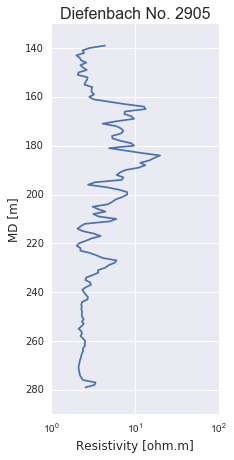

In [224]:
fig = plt.figure(figsize=(3, 7))

ax = fig.add_subplot(111)
ax.semilogx(res, d)
ax.set_title("Diefenbach No. 2905", size=16)
ax.set_xlabel("Resistivity [ohm.m]", size=12)
ax.set_ylabel("MD [m]", size=12)
ax.set_ylim([130, 290])
ax.grid('on')
ax.invert_yaxis()

plt.savefig("../../Agile/Blog-and-wiki/Pechelbronn_log_plot.png", dpi=180)
plt.show()

In [225]:
res

array([  4.3887391 ,   2.85342702,   2.36525565,   2.48066798,
         2.        ,   2.18885754,   2.27006814,   2.61885075,
         2.23403111,   2.40714968,   2.65487833,   2.12425697,
         2.07934099,   2.72583211,   2.67389656,   2.56526731,
         2.49683948,   3.09135723,   3.03011393,   3.03318389,
         3.25709305,   2.85145655,   3.19826338,   4.93931234,
         7.63768533,  12.84723576,  13.4441711 ,   7.61632686,
         7.47204332,   9.11532458,   9.74513338,   6.04116772,
         4.11616955,   5.96903893,   6.88082902,   7.28068721,
         6.82686744,   5.34298518,   5.38759582,   6.72234221,
         9.01647038,   9.78183381,   4.92059263,   7.69070133,
        12.031705  ,  20.        ,  17.02828857,  14.94904794,
        11.5984186 ,  13.33439299,  11.11820116,   7.65433754,
         6.62397517,   6.05706875,   7.28353051,   6.97565123,
         3.32212242,   2.75582161,   4.56423536,   6.3900945 ,
         8.05600943,   8.09354961,   7.10195983,   5.91

In [227]:
for x, r in zip(d, res):
    print("{:.1f}  {:.3f}".format(x, r))

KeyError: '>'